# Chapter 10: Introduction to Artificial Neural Networks with Keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

## Artificial Neural Network

The `artificial neuron` activates its output when more than a certain number of its inputs are active. Even with such a simplified model it is possible to build a network of artificial neurons that computes any logical proposition. To see how such a network works, let’s build a few ANNs that perform various logical computations, assuming that a neuron is activated when at least two of its input connections are active.

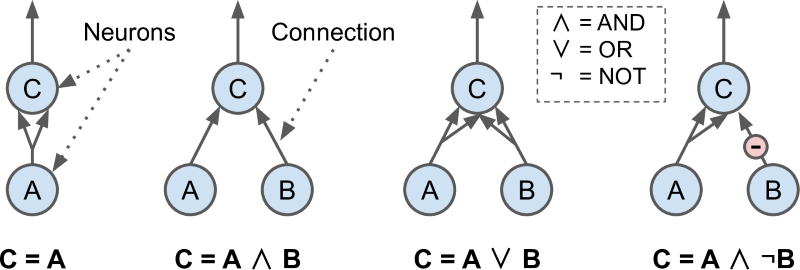

In [2]:
Image(filename='./images/mls3_1003.png')

### The Perceptron

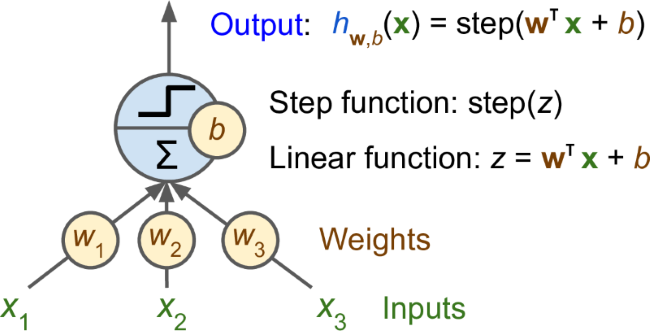

In [3]:
Image(filename='./images/mls3_1002.png')

Common step functions used in `Perceptrons` (assuming threshold = 0):
$$ \mathrm{heaviside} (z) = \begin{cases} 0, & \text{if } z<0 \\ 1, & \text{if } z\ge 0 \end{cases} ;  \quad \quad \quad \mathrm{sgn} (z) = \begin{cases} -1, & \text{if } z<0 \\ 0, &\text{if } z=0, \\ 1, & \text{if } z> 0 \end{cases} $$  

A `Perceptron` is composed of one or more `TLUs (Threshold Logic Unit)` organized in a single layer, where every `TLU` is connected to every input. Such a layer is called a `fully connected layer`, or a `dense layer`. The inputs constitute the `input layer`, and since the layer of `TLUs` produces the final outputs, it is called the `output layer`.

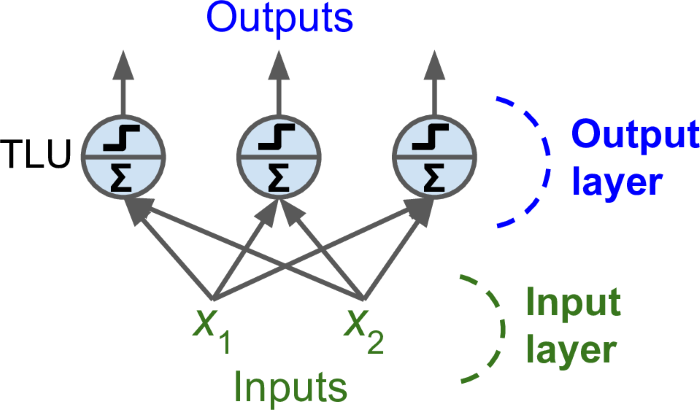

In [4]:
Image(filename='./images/mls3_1005.png')

Computing the outputs of a `desne layer`:
$$ h_{\mathbf{W}, \mathbf{b}} (\mathbf{X}) = \phi (\mathbf{X} \mathbf{W} + \mathbf{b} ). $$

`Perceptron` learning rule (weight update):
$$ w_{i,j}^{(new)}  = w_{i,j} + \eta (y_j - \hat{y}_j) x_i. $$

Scikit-Learn provides a `Perceptron` class which can be used pretty much as you would expect—for example, on the iris dataset

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X_iris, y_iris)

X_iris_new = [[2, 0.5], [3, 1]]
y_iris_pred = per_clf.predict(X_iris_new)
y_iris_pred

array([ True, False])

`Perceptron` learning algorithm strongly resembles `Stochastic Gradient Descent`. In fact, Scikit-Learn’s `Perceptron` class is equivalent to using an `SGDClassifier` with the following hyperparameters: `loss="perceptron"`, `learning_rate="constant"`, `eta0=1` (the learning rate), and `penalty=None` (no regularization).

### The Multilayer Perceptron and Backpropagation

`Perceptrons` are incapable of solving some trivial problems e.g., the `Exclusive OR (XOR)` classification problem. It turns out that some of the limitations of `Perceptrons` can be eliminated by stacking multiple `Perceptrons`. The resulting `ANN` is called a `Multilayer Perceptron (MLP)`. An `MLP` can solve the `XOR` problem as shown in the following figure.

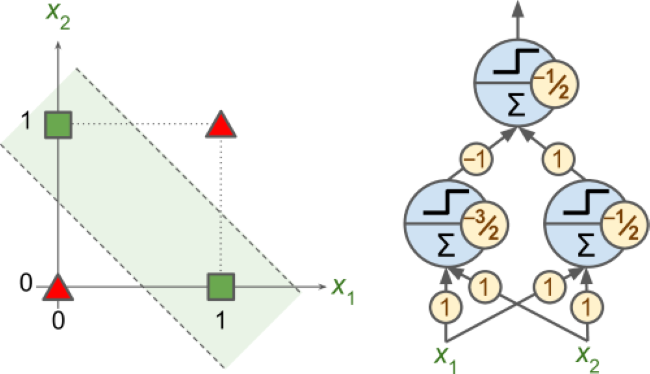

In [5]:
Image(filename='./images/mls3_1006.png')

An `MLP` is composed of one `input layer`, one or more layers of `TLUs`, called `hidden layers`, and one final layer of `TLUs` called the `output layer`. The layers close to the input layer are usually called the `lower layers`, and the ones close to the outputs are usually called the `upper layers`. When an `ANN` contains a deep stack of `hidden layers`,⁠ it is called a `deep neural network (DNN)`.

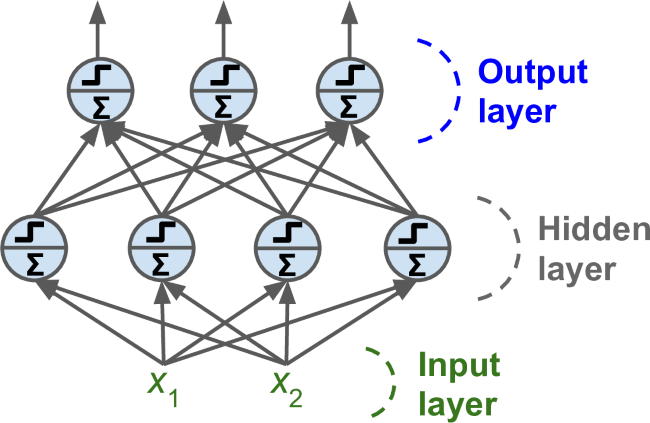

In [6]:
Image(filename='./images/mls3_1007.png')

Then in 1970, a researcher named `Seppo Linnainmaa` introduced, in his master thesis, a technique to compute all the gradients automatically and efficiently. This algorithm is now called `reverse-mode automatic differentiation` (or `reverse-mode autodiff` for short). In just two passes through the network (one forward, one backward), it is able to compute the gradients of the neural network’s error with regard to every single model parameter. In other words, it can find out how each connection weight and each bias should be tweaked in order to reduce the neural network’s error. These gradients can then be used to perform a Gradient Descent step. If you repeat this process of computing the gradients automatically and taking a Gradient Descent step, the neural network’s error will gradually drop, until it eventually reaches a minimum. This combination of `reverse-mode autodiff` and `Gradient Descent` is now called `backpropagation` (or `backprop` for short).

Hidden/Output Layer activation functions:
* `logistic/sigmoid` function, $\sigma(z) = \frac{1}{1 + e^{–z}}$.
* `hyperbolic tangent` function: $\tanh (z) = 2\sigma (2z) – 1$.
* `Rectified Linear Unit` function: $\mathrm{ReLU} (z) = \max (0, z)$.
* `softplus` function: $\mathrm{softplus} (z) = \log (1 + e^z)$.

### Regression MLP

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [4]:
rmse

0.5053326657968639

### Classification MLP

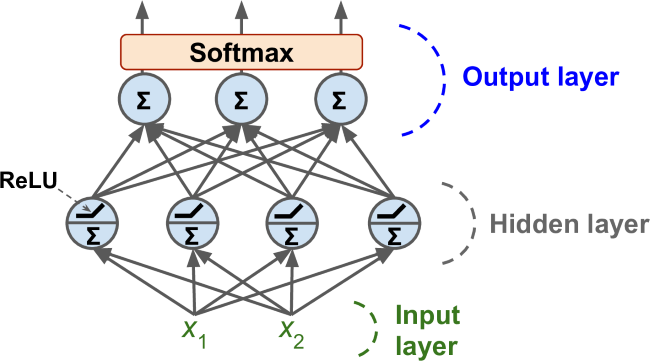

In [7]:
Image(filename='./images/mls3_1009.png')

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

mnist = fetch_openml('mnist_784', version=1, as_frame=False)  

X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train, X_test = X_train/255.0, X_test/255.0

mlp = MLPClassifier(hidden_layer_sizes=(20, ), max_iter=20, alpha=1e-4, solver='sgd', verbose=0, random_state=42, learning_rate_init=0.1)

mlp.fit(X_train, y_train)

print(f"Training set score: {mlp.score(X_train, y_train):.3f}")
print(f"Test set score: {mlp.score(X_test, y_test):.3f}")

Training set score: 0.978
Test set score: 0.954


## Implementing MLPs with Keras

Keras is TensorFlow’s high-level Deep Learning API: it allows you to build, train, evaluate, and execute all sorts of neural networks.

### Building an Image Classifier Using the Sequential API

We will use `Fashion MNIST`, which is a drop-in replacement of `MNIST`. It has the exact same format as `MNIST` (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than `MNIST`. For example, a simple *linear model* reaches about *92%* accuracy on `MNIST`, but only about *83%* on `Fashion MNIST`.

In [6]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:]

In [8]:
print(X_train.shape)
print(X_train.dtype)

(55000, 28, 28)
uint8


When loading `MNIST` or `Fashion MNIST` using *Keras* rather than *Scikit-Learn*, one important difference is that every image is represented as a $28 \times 28$ array rather than a 1D array of size $784$. Moreover, the pixel intensities are represented as integers (from $0$ to $255$) rather than floats (from $0.0$ to $255.0$).

In [9]:
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

### Creating the Model using the Sequential API

In [11]:
tf.random.set_seed(1)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Input(shape=[28,28]))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(100, activation="relu"))
model1.add(tf.keras.layers.Dense(100, activation="relu"))
model1.add(tf.keras.layers.Dense(10, activation="softmax"))

Specifying `activation="relu"` is equivalent to specifying `activation=tf.keras.activations.relu`.

Instead of adding the layers one by one as we just did, it’s often more convenient to pass a list of layers when creating the `Sequential model`. we can also drop the Input layer and instead specify the `input_shape` in the first layer:

In [12]:
tf.keras.backend.clear_session()

In [13]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

In [14]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model2.layers  # list of all the layers of the model

In [16]:
# input_layer = model2.layers[0]
hidden_layer_1 = model2.layers[1]
# hidden_layer_2 = model2.layers[2]
# output_layer = model2.layers[3]

In [17]:
weights, biases = hidden_layer_1.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


If we want to use a different initialization method, we can set `kernel_initializer` (kernel is another name for the matrix of connection weights) or `bias_initializer` when creating the layer.

### Compiling and Evaluating the Model

In [18]:
model2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.sparse_categorical_accuracy)

we use the `sparse_categorical_crossentropy` loss because we have sparse labels, and the classes are exclusive. If instead we had one target probability per class for each instance, then we would need to use the `categorical_crossentropy` loss instead. If we were doing *binary classification* or *multilabel binary classification*, then we would use the `sigmoid` activation function in the output layer instead of the `softmax` activation function, and we would use the `binary_crossentropy` loss.

In [19]:
history = model2.fit(X_train, y_train, epochs=30, verbose=0, validation_data=(X_val, y_val))

If we want to show loss after every $n$ batches, we can use:

`out_batch = NBatchLogger(display=1000)`

`model.fit([X_train_aux,X_train_main],Y_train,batch_size=128,callbacks=[out_batch])` 

The `fit()` method returns a `History` object containing the training parameters (`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a dictionary (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set.

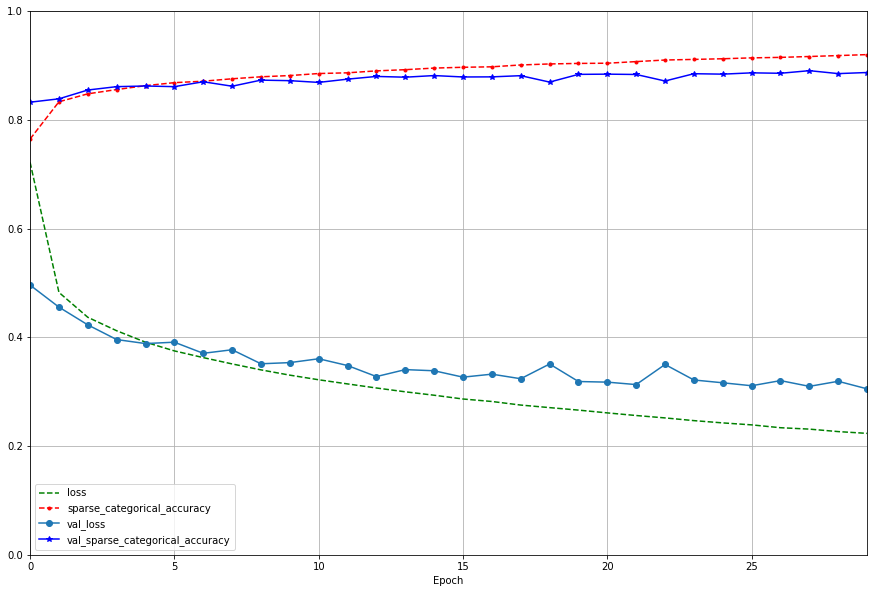

In [20]:
pd.DataFrame(history.history).plot(
    figsize=(15, 10), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["g--", "r--.", "o-", "b-*"])
plt.show()

In [21]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3243 - sparse_categorical_accuracy: 0.8846


[0.32426419854164124, 0.8845999836921692]

In [22]:
# make predictions
X_new = X_test[:3]
y_proba = model2.predict(X_new) # gives probabilities

y_pred = y_proba.argmax(axis=-1)
y_pred == y_test[:3]

array([ True,  True,  True])

The classifier classified all three images correctly.

### Building a Regression MLP Using the Sequential API

In [23]:
# resplitting california housing data 
X_train_full_h, X_test_h, y_train_full_h, y_test_h = train_test_split(
    housing.data, housing.target, random_state=42)
X_train_h, X_val_h, y_train_h, y_val_h = train_test_split(
    X_train_full_h, y_train_full_h, random_state=42)

In [24]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train_h.shape[1:])
model3 = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model3.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train_h)
history = model3.fit(X_train_h, y_train_h, epochs=20, verbose=0,
                    validation_data=(X_val_h, y_val_h))
mse_test, rmse_test = model3.evaluate(X_test_h, y_test_h)
X_new_h = X_test_h[:3]
y_pred_h = model3.predict(X_new_h)

162/162 [==============================] - 0s 2ms/step - loss: 0.2816 - root_mean_squared_error: 0.5306


In [25]:
y_pred_h

array([[0.47422472],
       [1.1498092 ],
       [4.939265  ]], dtype=float32)

### Building Complex Models Using the Functional API

One example of a nonsequential neural network is a `Wide & Deep neural network`. It connects all or part of the inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path).⁠ In contrast, a regular `MLP` forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

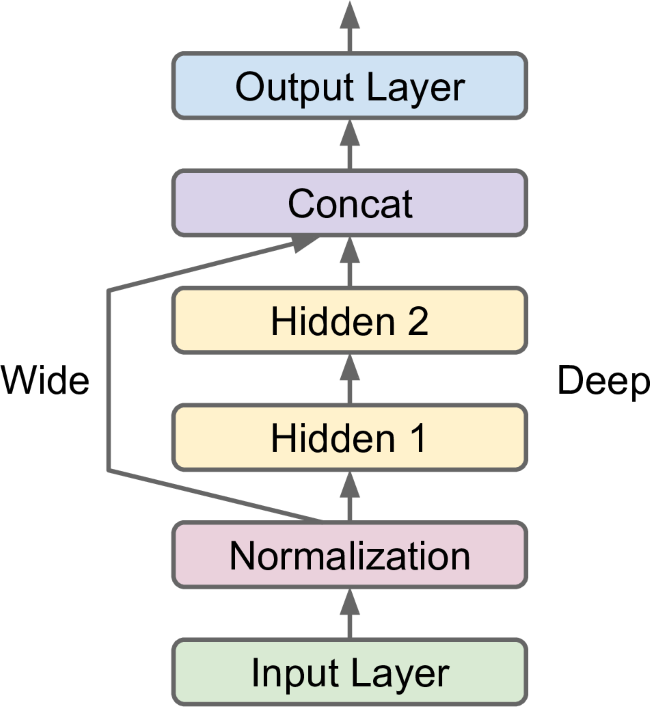

In [8]:
Image(filename='./images/mls3_1013.png')

In [26]:
normalization_layer = tf.keras.layers.Normalization()      
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
cancat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train_h.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = cancat_layer([input_, hidden2])
output = output_layer(concat)

model4 = tf.keras.Model(inputs=[input_], outputs=[output])

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model4.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train_h)

history = model4.fit(X_train_h, y_train_h, epochs=20, verbose=0,
                    validation_data=(X_val_h, y_val_h))
mse_test, rmse_test = model4.evaluate(X_test_h, y_test_h)
X_new_h = X_test_h[:3]
y_pred_h = model4.predict(X_new_h)

162/162 [==============================] - 0s 2ms/step - loss: 0.5095 - root_mean_squared_error: 0.7138


If we want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7). Then the following `wide & deep model` would work.

In [28]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model5 = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

Now we can compile the model as usual, but when we call the `fit()` method, instead of passing a single input matrix `X_train_h`, we must pass a pair of matrices (`X_train_wide`, `X_train_deep`): one per input. The same is true for `X_val_h`, and also for `X_test_h` and `X_new_h` when you call `evaluate()` or `predict()`

In [30]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model5.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train_h[:, :5], X_train_h[:, 2:]
X_val_wide, X_val_deep = X_val_h[:, :5], X_val_h[:, 2:]
X_test_wide, X_test_deep = X_test_h[:, :5], X_test_h[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model5.fit((X_train_wide, X_train_deep), y_train_h, epochs=20, verbose=0,
                    validation_data=((X_val_wide, X_val_deep), y_val_h))
                    
mse_test = model5.evaluate((X_test_wide, X_test_deep), y_test_h)
y_pred = model5.predict((X_new_wide, X_new_deep))

162/162 [==============================] - 0s 1ms/step - loss: 0.3327 - root_mean_squared_error: 0.5768


Adding an extra output is quite easy: just connect it to the appropriate layer and add it to the model’s list of outputs.

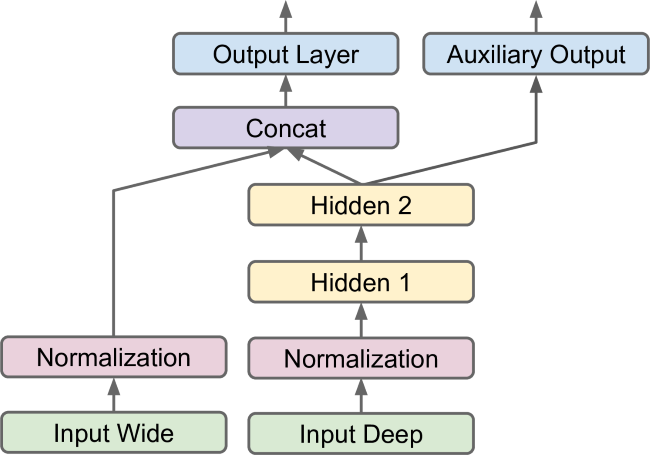

In [9]:
Image(filename='./images/mls3_1015.png')

In [31]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])

output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)    # auxilary output layer

model6 = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

Each output will need its own loss function. Therefore, when we compile the model, we should pass a list of losses. If we pass a single loss, Keras will assume that the same loss must be used for all outputs. By default, Keras will compute all the losses and simply add them up to get the final loss used for training. Since we care much more about the main output than about the auxiliary output (as it is just used for regularization), we want to give the main output’s loss a much greater weight.

In [32]:
model6.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

In [33]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model6.fit(
    (X_train_wide, X_train_deep), (y_train_h, y_train_h), epochs=20, verbose=0,
    validation_data=((X_val_wide, X_val_deep), (y_val_h, y_val_h))
)

In [34]:
eval_results = model6.evaluate((X_test_wide, X_test_deep), (y_test_h, y_test_h))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 3ms/step - loss: 0.3265 - dense_15_loss: 0.3206 - dense_16_loss: 0.3799 - dense_15_root_mean_squared_error: 0.5662 - dense_16_root_mean_squared_error: 0.6163


### Using the Subclassing API to Build Dynamic Models

Both the `Sequential API` and the `Functional API` are declarative: we start by declaring which layers we want to use and how they should be connected, and only then we can start feeding the model some data for training or inference. This has many advantages: the model can easily be saved, cloned, and shared; its structure can be displayed and analyzed; the framework can infer shapes and check types, so errors can be caught early (*i.e.*, before any data ever goes through the model). It’s also fairly straightforward to debug, since the whole model is a static graph of layers. But the flip side is just that: it’s static. Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, or simply if one prefers a more imperative programming style, the `Subclassing API` is the one to choose.

Creating an instance of the following `WideAndDeepModel` class gives us an equivalent model to the one we just built with the `Functional API`:

In [44]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units, activation, **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
    
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model7 = WideAndDeepModel(30, activation="relu", name="model_7")

This example looks very much like the `Functional API`, except we separate the creation of the layers⁠ in the constructor from their usage in the `call()` method. We also do not need to create the `Input` objects: we just use the `input` argument to the `call()` method.

In [45]:
# compile
model7.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

# adapt
model7.norm_layer_wide.adapt(X_train_wide)
model7.norm_layer_deep.adapt(X_train_deep)

# fit
history = model7.fit(
    (X_train_wide, X_train_deep), (y_train_h, y_train_h), epochs=20, verbose=0,
    validation_data=((X_val_wide, X_val_deep), (y_val_h, y_val_h))
)

#eval
eval_results = model7.evaluate((X_test_wide, X_test_deep), (y_test_h, y_test_h))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 1s 3ms/step - loss: 0.3274 - output_1_loss: 0.3220 - output_2_loss: 0.3758 - output_1_root_mean_squared_error: 0.5675 - output_2_root_mean_squared_error: 0.6130


### Saving and Restoring a Model

In [46]:
model7.save("keras_model_7", save_format="tf")

INFO:tensorflow:Assets written to: keras_model_7\assets


In [48]:
model_import = tf.keras.models.load_model("keras_model_7")

The `fit()` method accepts a `callbacks` argument that lets you specify a list of objects that `Keras` will call before and after training, before and after each epoch, and even before and after processing each batch. For example, the `ModelCheckpoint` callback saves checkpoints of the model at regular intervals during training, by default at the end of each epoch:

In [49]:
model_import.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                   save_weights_only=True)
history = model_import.fit(
    (X_train_wide, X_train_deep), (y_train_h, y_train_h), epochs=20, verbose=0,
    validation_data=((X_val_wide, X_val_deep), (y_val_h, y_val_h)), callbacks=[checkpoint_cb])

## Using TensorBoard for Visualization

`TensorBoard` is a great interactive visualization tool that we can use to view the learning curves during training, compare curves and metrics between multiple runs, visualize the computation graph, analyze training statistics, view images generated by your model, visualize complex multidimensional data projected down to 3D and automatically clustered, profile the network, and more!

In [50]:
%pip install -q -U tensorboard-plugin-profile

Note: you may need to restart the kernel to use updated packages.


In [51]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()  # e.g., my_logs/run_2022_08_01_17_25_59

`Keras` provides a convenient `TensorBoard()` callback which will take care of creating the log directory, and it will create event files and write summaries to them during training. It will measure the model’s training and validation loss and metrics (in this case, the MSE and RMSE), and it will also profile the neural network.

In [52]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model7.fit((X_train_wide, X_train_deep), (y_train_h, y_train_h), epochs=20, verbose=0,
    validation_data=((X_val_wide, X_val_deep), (y_val_h, y_val_h)), callbacks=[tensorboard_cb])

## Fine-Tuning Neural Network Hyperparameters

We can use the `Keras Tuner` library, which is a hyperparameter tuning library for `Keras` models. It offers several tuning strategies, it’s highly customizable, and it has excellent integration with `TensorBoard`. 

In [56]:
%pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [57]:
import keras_tuner as kt

In [58]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

The first part of the function defines the hyperparameters. For example, `hp.Int("n_hidden", min_value=0, max_value=8, default=2)` checks whether a hyperparameter named `"n_hidden"` is already present in the `HyperParameters` object `hp`, and if so it returns its value. If not, then it registers a new integer hyperparameter named `"n_hidden"`, whose possible values range from `0 to 8 (inclusive)`, and it returns the `default` value, (when default is not set, then `min_value` is returned). The `"learning_rate"` hyperparameter is registered as a float ranging from `$10^{–4} to $10^{–2}`, and since `sampling="log"`, learning rates of all scales will be sampled equally. Lastly, the optimizer hyperparameter is registered with two possible values: `"sgd" or "adam"` (the default value is the first one, which is `"sgd"` in this case). Depending on the value of optimizer, we create an `SGD` optimizer or an `Adam` optimizer with the given learning rate.

In [60]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)

# on fashion_MNIST dataset    
random_search_tuner.search(X_train, y_train, epochs=10, verbose=0,
                           validation_data=(X_val, y_val))

INFO:tensorflow:Oracle triggered exit


In [61]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [62]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 5,
 'n_neurons': 70,
 'learning_rate': 0.00041268008323824807,
 'optimizer': 'adam'}

Each tuner is guided by a so-called *oracle*: before each trial, the tuner asks the oracle to tell it what the next trial should be. The `RandomSearch` tuner uses a `RandomSearchOracle`, which is pretty basic: it just picks the next trial randomly, as we saw earlier.

In [64]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 5
n_neurons: 70
learning_rate: 0.00041268008323824807
optimizer: adam
Score: 0.8823999762535095


In [65]:
best_trial.metrics.get_last_value("val_accuracy")

0.8823999762535095

In [68]:
best_model.fit(X_train, y_train, epochs=10, verbose=0)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3911 - accuracy: 0.8756
Test loss: 0.39109209179878235
Test accuracy 0.8755999803543091


In [72]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [73]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [74]:
root_logdir = Path(hyperband_tuner.project_dir)/"tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_val, y_val),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 01m 26s]
val_accuracy: 0.8442000150680542

Best val_accuracy So Far: 0.8838000297546387
Total elapsed time: 00h 46m 05s
INFO:tensorflow:Oracle triggered exit
